In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('spreadspoke_scores.csv')
df.dtypes

schedule_date           object
schedule_season          int64
schedule_week           object
team_home               object
team_away               object
stadium                 object
team_favorite_id        object
spread_favorite        float64
over_under_line         object
weather_detail          object
weather_temperature    float64
weather_wind_mph       float64
weather_humidity        object
score_home               int64
score_away               int64
stadium_neutral           bool
schedule_playoff          bool
game_id                 object
dtype: object

In [3]:
#drop columns with missing values
df = df.dropna(subset=['team_favorite_id', 'spread_favorite', 'over_under_line'])
df.index= range(0,len(df))
df = df.drop(columns=['game_id','stadium_neutral','schedule_playoff', 'stadium','schedule_date'])

In [4]:
df['weather_humidity']=df['weather_humidity'].apply(pd.to_numeric, errors='coerce')
df['over_under_line']=df['over_under_line'].apply(pd.to_numeric, errors='coerce')
#df['schedule_date']=df['schedule_date'].apply(pd.to_datetime)

In [5]:
#cleaning team_fav_id to correctly match team names in instances where team moved city
df.loc[df.team_favorite_id =='SD','team_favorite_id'] = 'LAC'
df.loc[(df.team_favorite_id=='LAR') & (df.team_home!= 'Los Angeles Rams') & (df.team_away!= 'Los Angeles Rams') & (df.team_home!= 'St. Louis Rams') & (df.team_away!= 'St. Louis Rams'), 'team_favorite_id']='OAK'
df.loc[((df.team_home=='Baltimore Colts') | (df.team_away=='Baltimore Colts')) & (df.team_favorite_id=='BAL'), 'team_favorite_id'] = 'IND'

In [6]:
special_weather_df = df[(df.weather_detail.isna() == False) & (df.weather_detail != 'DOME')]

In [7]:
#convert playoff rounds into ints (started at 19 bc seasons '93 and '99 had 18 weeks)
df.loc[(df.schedule_week=='WildCard') | (df.schedule_week=='Wildcard'), 'schedule_week']=19
df.loc[(df.schedule_week=='Division'), 'schedule_week']=20
df.loc[(df.schedule_week=='Conference'), 'schedule_week']=21
df.loc[(df.schedule_week=='Superbowl') | (df.schedule_week=='SuperBowl'), 'schedule_week']=22

#convert into ints
df.schedule_week = df.schedule_week.astype('int64')

In [8]:
df['point_total'] = df['score_home'] + df['score_away']

In [9]:
df['over_under_result'] = np.where(df['point_total']>df['over_under_line'], 'over', 'under')
df['over_under_result'] = np.where(df['point_total']==df['over_under_line'], 'push', df['over_under_result'])

In [10]:
df['score_difference'] = df['score_home'] - df['score_away']

In [11]:
teams_dict = {'Baltimore Ravens': 'BAL', 'Jacksonville Jaguars': 'JAX',
 'Carolina Panthers': 'CAR', 'Green Bay Packers': 'GB','St. Louis Cardinals': 'ARI',
 'Los Angeles Raiders': 'OAK','Detroit Lions': 'DET','Cincinnati Bengals': 'CIN',
 'Los Angeles Rams': 'LAR','Oakland Raiders': 'OAK',
 'Houston Texans': 'HOU', 'Tennessee Titans': 'TEN', 'New York Jets': 'NYJ',
 'St. Louis Rams': 'LAR', 'Baltimore Colts': 'IND', 'Los Angeles Chargers': 'LAC',
 'Phoenix Cardinals': 'ARI', 'San Diego Chargers': 'LAC', 'Indianapolis Colts': 'IND',
 'Washington Redskins': 'WAS', 'Miami Dolphins': 'MIA', 'Buffalo Bills': 'BUF',
 'Tennessee Oilers': 'TEN', 'Minnesota Vikings': 'MIN', 'Atlanta Falcons': 'ATL',
 'New Orleans Saints': 'NO', 'Pittsburgh Steelers': 'PIT','Kansas City Chiefs': 'KC', 
 'Denver Broncos': 'DEN', 'New York Giants': 'NYG', 'Houston Oilers': 'TEN',
 'Cleveland Browns': 'CLE', 'Philadelphia Eagles': 'PHI', 'Dallas Cowboys': 'DAL',
 'Arizona Cardinals': 'ARI', 'Chicago Bears': 'CHI', 'New England Patriots': 'NE',
 'San Francisco 49ers': 'SF','Tampa Bay Buccaneers': 'TB','Seattle Seahawks': 'SEA'}
teams_dict

{'Baltimore Ravens': 'BAL',
 'Jacksonville Jaguars': 'JAX',
 'Carolina Panthers': 'CAR',
 'Green Bay Packers': 'GB',
 'St. Louis Cardinals': 'ARI',
 'Los Angeles Raiders': 'OAK',
 'Detroit Lions': 'DET',
 'Cincinnati Bengals': 'CIN',
 'Los Angeles Rams': 'LAR',
 'Oakland Raiders': 'OAK',
 'Houston Texans': 'HOU',
 'Tennessee Titans': 'TEN',
 'New York Jets': 'NYJ',
 'St. Louis Rams': 'LAR',
 'Baltimore Colts': 'IND',
 'Los Angeles Chargers': 'LAC',
 'Phoenix Cardinals': 'ARI',
 'San Diego Chargers': 'LAC',
 'Indianapolis Colts': 'IND',
 'Washington Redskins': 'WAS',
 'Miami Dolphins': 'MIA',
 'Buffalo Bills': 'BUF',
 'Tennessee Oilers': 'TEN',
 'Minnesota Vikings': 'MIN',
 'Atlanta Falcons': 'ATL',
 'New Orleans Saints': 'NO',
 'Pittsburgh Steelers': 'PIT',
 'Kansas City Chiefs': 'KC',
 'Denver Broncos': 'DEN',
 'New York Giants': 'NYG',
 'Houston Oilers': 'TEN',
 'Cleveland Browns': 'CLE',
 'Philadelphia Eagles': 'PHI',
 'Dallas Cowboys': 'DAL',
 'Arizona Cardinals': 'ARI',
 'Chicago 

In [12]:
#create home and away id columns
df['home_id'] = ''
df['away_id'] = ''
df['home_id'] = df.team_home.map(teams_dict)
df['away_id'] = df.team_away.map(teams_dict)


In [13]:
df['home_favorite'] = 0
df.loc[df.home_id == df.team_favorite_id,'home_favorite'] = 1
df

,schedule_season,schedule_week,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,weather_detail,weather_temperature,weather_wind_mph,weather_humidity,score_home,score_away,point_total,over_under_result,score_difference,home_id,away_id,home_favorite
0,1967,22,Green Bay Packers,Oakland Raiders,GB,-13.5,43.0,60 degrees- humidity 74%- wind 12 mph,60.0,12.0,74.0,33,14,47,over,19,GB,OAK,1
1,1968,22,Baltimore Colts,New York Jets,IND,-18.0,40.0,66 degrees- humidity 80%- wind 12 mph,66.0,12.0,80.0,7,16,23,under,-9,IND,NYJ,1
2,1969,22,Kansas City Chiefs,Minnesota Vikings,MIN,-12.0,39.0,55 degrees- humidity 84%- wind 14 mph,55.0,14.0,84.0,23,7,30,under,16,KC,MIN,0
3,1970,22,Baltimore Colts,Dallas Cowboys,IND,-2.5,36.0,59 degrees- humidity 60%- wind 11 mph,59.0,11.0,60.0,16,13,29,under,3,IND,DAL,1
4,1971,22,Dallas Cowboys,Miami Dolphins,DAL,-6.0,34.0,34 degrees- humidity 40%- wind 18 mph- wind c...,34.0,18.0,40.0,24,3,27,under,21,DAL,MIA,1
5,1972,22,Miami Dolphins,Washington Redskins,MIA,-1.0,33.0,64 degrees- humidity 53%- wind 7 mph,64.0,7.0,53.0,14,7,21,under,7,MIA,WAS,1
6,1973,22,Miami Dolphins,Minnesota Vikings,MIA,-6.5,33.0,47 degrees- humidity 81%- wind 7 mph,47.0,7.0,81.0,24,7,31,under,17,MIA,MIN,1
7,1974,22,Minnesota Vikings,Pittsburgh Steelers,PIT,-3.0,33.0,51 degrees- humidity 72%- wind 17 mph,51.0,17.0,72.0,6,16,22,under,-10,MIN,PIT,0
8,1975,22,Dallas Cowboys,Pittsburgh Steelers,PIT,-7.0,36.0,49 degrees- humidity 44%- wind 18 mph,49.0,18.0,44.0,17,21,38,over,-4,DAL,PIT,0
9,1976,22,Minnesota Vikings,Oakland Raiders,OAK,-4.0,38.0,52 degrees- humidity 59%- wind 6 mph,52.0,6.0,59.0,14,32,46,over,-18,MIN,OAK,0


In [14]:
#determine whether favorite covered the spread, or push if even
df['favorite_covered'] = np.where((df.home_favorite==1) & (np.abs(df.score_difference) > np.abs(df.spread_favorite)),1,0)
df['favorite_covered'] = np.where((np.abs(df.score_difference) == np.abs(df.spread_favorite)),'2',df.favorite_covered)


In [15]:
df.tail()

,schedule_season,schedule_week,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,weather_detail,weather_temperature,weather_wind_mph,weather_humidity,score_home,score_away,point_total,over_under_result,score_difference,home_id,away_id,home_favorite,favorite_covered
9650,2017,20,Minnesota Vikings,New Orleans Saints,MIN,-5.5,46.5,DOME,72.0,0.0,NaN,29,24,53,over,5,MIN,NO,1,0
9651,2017,20,Pittsburgh Steelers,Jacksonville Jaguars,PIT,-7.0,40.5,NaN,18.0,2.0,NaN,42,45,87,over,-3,PIT,JAX,1,0
9652,2017,21,New England Patriots,Jacksonville Jaguars,NE,-7.5,46.0,NaN,48.0,2.0,NaN,24,20,44,under,4,NE,JAX,1,0
9653,2017,21,Philadelphia Eagles,Minnesota Vikings,MIN,-3.0,39.0,NaN,46.0,1.0,NaN,38,7,45,over,31,PHI,MIN,0,0
9654,2017,22,New England Patriots,Philadelphia Eagles,NE,-4.5,48.5,DOME,72.0,0.0,NaN,33,41,74,over,-8,NE,PHI,1,1


In [16]:
#which team won the game outright (no spread)
df['winning_team'] = ''
df['winning_team'] = np.where(df.score_home > df.score_away, df.home_id, df.away_id)
df['winning_team'] = np.where(df.score_home == df.score_away, 'tie', df.winning_team)

df['losing_team'] = ''
df['losing_team'] = np.where(df.score_home < df.score_away, df.home_id, df.away_id)
df['losing_team'] = np.where(df.score_home == df.score_away, 'tie', df.losing_team)

In [17]:
df['home_wins'] = 0
df['home_losses'] = 0
df['home_ties'] = 0
df['away_wins'] = 0
df['away_losses'] = 0
df['away_ties'] = 0

In [18]:
sum((df['schedule_season'] == 2017) & (df['schedule_week'] < 5) & (df['winning_team'] == 'NE'))

2

In [19]:
def get_record(df):
    home_wins = []
    home_losses = []
    home_ties = []
    away_wins = []
    away_losses = []
    away_ties = []
    for index, row in df.iterrows():
        week = row.schedule_week
        season = row.schedule_season
        home_id = row.home_id
        away_id = row.away_id
        
        hw = sum((df['schedule_season'] == season) & (df['schedule_week'] < week) & (df['winning_team'] == home_id))
        home_wins.append(hw)
        hl = sum((df['schedule_season'] == season) & (df['schedule_week'] < week) & (df['losing_team'] == home_id))
        home_losses.append(hl)
        ht = sum((df['schedule_season'] == season) & (df['schedule_week'] < week) & (df['winning_team'] == 'tie') & (df['home_id'] == home_id))
        home_ties.append(ht)
        
        aw = sum((df['schedule_season'] == season) & (df['schedule_week'] < week) & (df['winning_team'] == away_id))
        away_wins.append(aw) 
        al = sum((df['schedule_season'] == season) & (df['schedule_week'] < week) & (df['losing_team'] == away_id))
        away_losses.append(al)
        at = sum((df['schedule_season'] == season) & (df['schedule_week'] < week) & (df['winning_team'] == 'tie') & (df['away_id'] == away_id))
        away_ties.append(at)
        
    return home_wins, home_losses, home_ties, away_wins, away_losses, away_ties
        
home_wins, home_losses, home_ties, away_wins, away_losses, away_ties = get_record(df)

In [20]:
df_filter = df.filter(items=['schedule_season', 'schedule_week', 'winning_team', 'home_id','home_wins'])

In [21]:
df['home_wins'] = home_wins
df['home_losses'] = home_losses
df['home_ties'] = home_ties
df['away_wins'] = away_wins
df['away_losses'] = away_losses
df['away_ties'] = away_ties

#df[(df.schedule_season==2017) & ((df.home_id == 'NYG') | (df.away_id == 'NYG'))]

In [22]:
def get_point_differential(df):
    result_array = np.empty((0,4))
    
    for index, row in df.iterrows():
        week = row.schedule_week
        season = row.schedule_season
        team_1 = row.home_id
        team_2 = row.away_id
        
        team_1_home_points=np.sum(df.score_home[(df['schedule_season'] == season) & (df['schedule_week'] < week) & (df['home_id'] == team_1)])
        team_1_away_points=np.sum(df.score_away[(df['schedule_season'] == season) & (df['schedule_week'] < week) & (df['away_id'] == team_1)])
        team_1_total_points = team_1_home_points+team_1_away_points
        
        team_1_home_points_against=np.sum(df.score_away[(df['schedule_season'] == season) & (df['schedule_week'] < week) & (df['home_id'] == team_1)])
        team_1_away_points_against=np.sum(df.score_home[(df['schedule_season'] == season) & (df['schedule_week'] < week) & (df['away_id'] == team_1)])
        team_1_total_points_against = team_1_home_points_against+team_1_away_points_against
        
        team_2_home_points=np.sum(df.score_home[(df['schedule_season'] == season) & (df['schedule_week'] < week) & (df['home_id'] == team_2)])
        team_2_away_points=np.sum(df.score_away[(df['schedule_season'] == season) & (df['schedule_week'] < week) & (df['away_id'] == team_2)])
        team_2_total_points = team_2_home_points+team_2_away_points
        
        team_2_home_points_against=np.sum(df.score_away[(df['schedule_season'] == season) & (df['schedule_week'] < week) & (df['home_id'] == team_2)])
        team_2_away_points_against=np.sum(df.score_home[(df['schedule_season'] == season) & (df['schedule_week'] < week) & (df['away_id'] == team_2)])
        team_2_total_points_against = team_2_home_points_against+team_2_away_points_against
    
        result_array = np.append(result_array, values=[[team_1_total_points, team_1_total_points_against, team_2_total_points, team_2_total_points_against]],axis=0)
        
    return result_array
        

In [23]:
point_diff_arr = get_point_differential(df)

In [24]:
point_diff_df = pd.DataFrame(point_diff_arr, columns=['home_points_for','home_points_against', 'away_points_for', 'away_points_against'], dtype='int')

In [25]:
df = pd.concat([df,point_diff_df],axis=1)

In [26]:

df['h_games'] = df['home_wins'] + df['home_losses'] + df['home_ties']
df['a_games'] = df['away_wins'] + df['away_losses'] + df['away_ties']

df['home_win_pct'] = np.round((df.home_wins+0.5*df.home_ties)/(df.h_games),3)
df['away_win_pct'] = np.round((df.away_wins+0.5*df.away_ties)/(df.a_games),3)
df['win_pct_diff'] = df.home_win_pct - df.away_win_pct

df['h_ppg'] = np.round((df.home_points_for/df.h_games),2)
df['h_papg'] = np.round((df.home_points_against/df.h_games),2)
df['a_ppg'] = np.round((df.away_points_for/df.a_games),2)
df['a_papg'] = np.round((df.away_points_against/df.a_games),2)

df['home_pt_diff_pg'] = np.round((df.home_points_for - df.home_points_against)/df.h_games, 3)
df['away_pt_diff_pg'] = np.round((df.away_points_for - df.away_points_against)/df.a_games, 3)
df['pt_diff_pg'] = df.home_pt_diff_pg - df.away_pt_diff_pg


In [27]:
def p_win_exp(df):
    array = np.empty((0,2))
    for index, row in df.iterrows():
        team1_pf = row.home_points_for
        team1_pa = row.home_points_against
        team2_pf = row.away_points_for
        team2_pa = row.away_points_against
        team_1_games = row.h_games + .001
        team_2_games = row.a_games + .001
        team1_exp = 1.5 * np.log((team1_pf + team1_pa)/team_1_games)
        team2_exp = 1.5 * np.log((team2_pf + team2_pa)/team_2_games)
        team1_pyth = ((team1_pf**team1_exp)/(team1_pf**team1_exp + team1_pa**team1_exp))
        team2_pyth = ((team2_pf**team2_exp)/(team2_pf**team2_exp + team2_pa**team2_exp))
        array = np.append(array, values = [[team1_pyth, team2_pyth]], axis = 0)
    return array

In [28]:
test = p_win_exp(df)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


In [29]:
test_df = pd.DataFrame(test, columns = ['home_exp_win_pct','away_exp_win_pct']) 
df = pd.concat([df,test_df], axis = 1)

In [30]:
df.corr()
#pd.plotting.scatter_matrix(df);

,schedule_season,schedule_week,spread_favorite,over_under_line,weather_temperature,weather_wind_mph,weather_humidity,score_home,score_away,point_total,...,win_pct_diff,h_ppg,h_papg,a_ppg,a_papg,home_pt_diff_pg,away_pt_diff_pg,pt_diff_pg,home_exp_win_pct,away_exp_win_pct
schedule_season,1.000000,0.043183,-0.021448,0.302191,0.077884,-0.232976,-0.084873,0.054854,0.080308,0.096494,...,-0.005907,0.114653,0.118947,0.106430,0.117424,0.002758,-0.001849,0.002993,0.001200,0.002905
schedule_week,0.043183,1.000000,-0.083273,0.005682,-0.476890,0.032504,0.009771,0.042753,-0.018517,0.018116,...,0.053996,0.111792,-0.052394,0.029174,-0.016497,0.112768,0.031233,0.058157,0.117660,0.053879
spread_favorite,-0.021448,-0.083273,1.000000,-0.063236,0.061776,-0.027542,-0.000512,-0.147955,0.122776,-0.021381,...,-0.320541,-0.213410,0.125125,0.222042,-0.167942,-0.231692,0.265335,-0.357234,-0.244483,0.277969
over_under_line,0.302191,0.005682,-0.063236,1.000000,0.155061,-0.238280,-0.066874,0.199866,0.192984,0.281463,...,0.002278,0.459092,0.290065,0.420446,0.262358,0.132769,0.123889,0.005824,0.126206,0.118937
weather_temperature,0.077884,-0.476890,0.061776,0.155061,1.000000,-0.416003,-0.022677,-0.013868,0.071623,0.040395,...,-0.051562,-0.026757,0.075520,0.020057,0.000824,-0.068628,0.013547,-0.057997,-0.074553,0.012283
weather_wind_mph,-0.232976,0.032504,-0.027542,-0.238280,-0.416003,1.000000,0.036637,-0.055085,-0.112542,-0.119360,...,0.053366,-0.027233,-0.119579,-0.051267,-0.016885,0.059675,-0.024990,0.060197,0.063877,-0.028936
weather_humidity,-0.084873,0.009771,-0.000512,-0.066874,-0.022677,0.036637,1.000000,-0.009705,-0.020595,-0.021544,...,0.009829,-0.009172,-0.050022,-0.007146,-0.002053,0.026823,-0.003703,0.021037,0.021260,-0.001085
score_home,0.054854,0.042753,-0.147955,0.199866,-0.013868,-0.055085,-0.009705,1.000000,-0.025665,0.710544,...,0.178657,0.225213,-0.063439,-0.024371,0.103959,0.199647,-0.084882,0.204531,0.199582,-0.096969
score_away,0.080308,-0.018517,0.122776,0.192984,0.071623,-0.112542,-0.020595,-0.025665,1.000000,0.685185,...,-0.206338,-0.045201,0.161012,0.212234,-0.054280,-0.137017,0.184352,-0.231536,-0.147920,0.186406
point_total,0.096494,0.018116,-0.021381,0.281463,0.040395,-0.119360,-0.021544,0.710544,0.685185,1.000000,...,-0.015254,0.132133,0.067236,0.131776,0.037460,0.048838,0.068069,-0.014163,0.041110,0.060715


In [31]:
# corr_mask = df.drop(columns=['score_difference','point_total', 'schedule_season', 'schedule_week','score_home', 'score_away',])
# # corr_mask['h_games'] = corr_mask['home_wins'] + corr_mask['home_losses'] + corr_mask['home_ties']
# # corr_mask['a_games'] = corr_mask['away_wins'] + corr_mask['away_losses'] + corr_mask['away_ties']

# # corr_mask['home_win_pct'] = np.round((corr_mask.home_wins+0.5*corr_mask.home_ties)/(corr_mask.h_games),3)
# # corr_mask['away_win_pct'] = np.round((corr_mask.away_wins+0.5*corr_mask.away_ties)/(corr_mask.a_games),3)
# # corr_mask['win_pct_diff'] = corr_mask.home_win_pct - corr_mask.away_win_pct

# # corr_mask['h_ppg'] = np.round((corr_mask.home_points_for/corr_mask.h_games),2)
# # corr_mask['h_papg'] = np.round((corr_mask.home_points_against/corr_mask.h_games),2)
# # corr_mask['a_ppg'] = np.round((corr_mask.away_points_for/corr_mask.a_games),2)
# # corr_mask['a_papg'] = np.round((corr_mask.away_points_against/corr_mask.a_games),2)

# # corr_mask['home_pt_diff_pg'] = np.round((corr_mask.home_points_for - corr_mask.home_points_against)/corr_mask.h_games, 3)
# # corr_mask['away_pt_diff_pg'] = np.round((corr_mask.away_points_for - corr_mask.away_points_against)/corr_mask.a_games, 3)
# # corr_mask['pt_diff_pg'] = corr_mask.home_pt_diff_pg - corr_mask.away_pt_diff_pg

# corr_mask.columns

# # df2 = corr_mask.drop(columns=['home_wins', 'home_losses', 'home_ties', 'away_wins', 
# #     'away_losses', 'away_ties', 'home_points_for', 'home_points_against','away_points_for', 
# #     'away_points_against', 'h_games', 'a_games', 'home_win_pct', 'away_win_pct',
# #     'home_pt_diff_pg','away_pt_diff_pg'])

In [32]:
# corr_mask.corr()

In [33]:
# df2.corr()
# pd.plotting.scatter_matrix(df2,figsize=(20,20),grid=True,diagonal='kde');

In [34]:
def get_record_last_4(df):
    result_array = np.empty((0,2))

    for index, row in df.iterrows():
        week = row.schedule_week
        season = row.schedule_season
        home_id = row.home_id
        away_id = row.away_id

        h_w_last_4 = sum((df['schedule_season'] == season) & (df['schedule_week'] < week) & (df['schedule_week'] > (week-5)) & (df['winning_team'] == home_id))
        h_l_last_4 = sum((df['schedule_season'] == season) & (df['schedule_week'] < week) & (df['schedule_week'] > (week-5)) & (df['winning_team'] == away_id))
        h_t_last_4 = sum((df['schedule_season'] == season) & (df['schedule_week'] < week) & (df['schedule_week'] > (week-5)) & (df['winning_team'] == 'tie') & (df['home_id'] == home_id))

        h_win_pct_last_4 = np.round(((h_w_last_4 + 0.5*h_t_last_4) / 4),3)

        a_w_last_4 = sum((df['schedule_season'] == season) & (df['schedule_week'] < week) & (df['schedule_week'] > (week-5)) & (df['winning_team'] == away_id))
        a_l_last_4 = sum((df['schedule_season'] == season) & (df['schedule_week'] < week) & (df['schedule_week'] > (week-5)) & (df['winning_team'] == home_id))
        a_t_last_4 = sum((df['schedule_season'] == season) & (df['schedule_week'] < week) & (df['schedule_week'] > (week-5)) & (df['winning_team'] == 'tie') & (df['away_id'] == away_id))

        a_win_pct_last_4 = np.round(((a_w_last_4 + 0.5*a_t_last_4) / 4),3)

        result_array = np.append(result_array, values = [[h_win_pct_last_4, a_win_pct_last_4]], axis = 0)

    return result_array

last_4_arr = get_record_last_4(df)

In [35]:
last_4_df = pd.DataFrame(last_4_arr,columns=['home_win_pct_last_4', 'away_win_pct_last_4'])
last_4_df

df = pd.concat([df,last_4_df],axis=1)

### To-do:
* convert points for and against, and points differential to per game. helps normalize data
* should we use diff or both home an away for each stat
* ppg and papg as indicators for o/u

In [36]:
df.tail()

,schedule_season,schedule_week,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,weather_detail,weather_temperature,weather_wind_mph,...,h_papg,a_ppg,a_papg,home_pt_diff_pg,away_pt_diff_pg,pt_diff_pg,home_exp_win_pct,away_exp_win_pct,home_win_pct_last_4,away_win_pct_last_4
9650,2017,20,Minnesota Vikings,New Orleans Saints,MIN,-5.5,46.5,DOME,72.0,0.0,...,15.75,28.18,20.71,8.125,7.471,0.654,0.908537,0.857819,0.50,0.50
9651,2017,20,Pittsburgh Steelers,Jacksonville Jaguars,PIT,-7.0,40.5,NaN,18.0,2.0,...,19.25,25.12,15.94,6.125,9.176,-3.051,0.828341,0.926463,0.50,0.25
9652,2017,21,New England Patriots,Jacksonville Jaguars,NE,-7.5,46.0,NaN,48.0,2.0,...,18.24,26.22,17.39,10.765,8.833,1.932,0.936002,0.911022,0.50,0.50
9653,2017,21,Philadelphia Eagles,Minnesota Vikings,MIN,-3.0,39.0,NaN,46.0,1.0,...,17.94,24.18,16.24,9.824,7.941,1.883,0.924388,0.901091,0.25,0.50
9654,2017,22,New England Patriots,Philadelphia Eagles,NE,-4.5,48.5,DOME,72.0,0.0,...,18.33,28.33,17.33,10.389,11.000,-0.611,0.930445,0.943573,0.50,0.50


In [37]:
df.to_csv('nfl_betting_df.csv')

In [221]:
ages = list(range(9,19))
avg_heights = [128,144,148,154,158,161,165,164,166,167]

#height = 3.76*age + 104.7
y = [3.76*age + 104.7 for age in ages]

r=.92

#plot data and regression line 
#transform using log transformation
#perform regression analysis
y

[138.54,
 142.3,
 146.06,
 149.82,
 153.57999999999998,
 157.34,
 161.1,
 164.86,
 168.62,
 172.38]

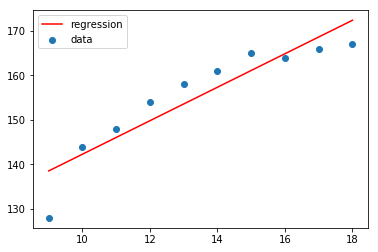

In [215]:
plt.scatter(ages,avg_heights,label='data')
plt.plot(ages,y,label='regression',c='r')
plt.legend()

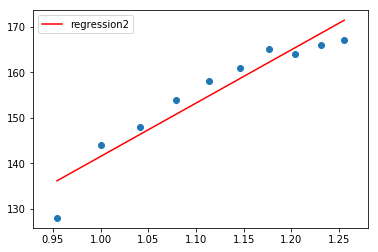

In [225]:
x = np.log10(ages)
y = [117.2*age + 24.3 for age in x]

plt.scatter(x,avg_heights)
plt.plot(x,y,label='regression2',c='r')
plt.legend()


In [218]:
np.log10(ages)

array([0.95424251, 1.        , 1.04139269, 1.07918125, 1.11394335,
       1.14612804, 1.17609126, 1.20411998, 1.23044892, 1.25527251])

In [219]:
np.log(ages)

array([2.19722458, 2.30258509, 2.39789527, 2.48490665, 2.56494936,
       2.63905733, 2.7080502 , 2.77258872, 2.83321334, 2.89037176])